In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss 

In [4]:
autos = pd.read_csv(r"C:\Users\Nithya\Downloads\autos.csv",sep=",",encoding="latin-1")
autos

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [5]:
autos=autos.drop_duplicates()

In [6]:
autos = autos.fillna("Not mentioned")

In [9]:
#1) Can you tell me No of Vehicles by Brand Available on ebay for sale with the help of visualization

In [10]:
b=autos['brand'].value_counts()
b

volkswagen        79639
bmw               40274
opel              40136
mercedes_benz     35307
audi              32873
ford              25573
renault           17969
peugeot           11027
fiat               9676
seat               7022
mazda              5695
skoda              5641
smart              5249
citroen            5182
nissan             5037
toyota             4694
sonstige_autos     3982
hyundai            3646
mini               3394
volvo              3327
mitsubishi         3061
honda              2836
kia                2555
alfa_romeo         2345
suzuki             2327
porsche            2215
chevrolet          1845
chrysler           1452
dacia               900
jeep                807
daihatsu            806
subaru              779
land_rover          770
jaguar              621
trabant             591
daewoo              542
saab                530
rover               490
lancia              484
lada                225
Name: brand, dtype: int64

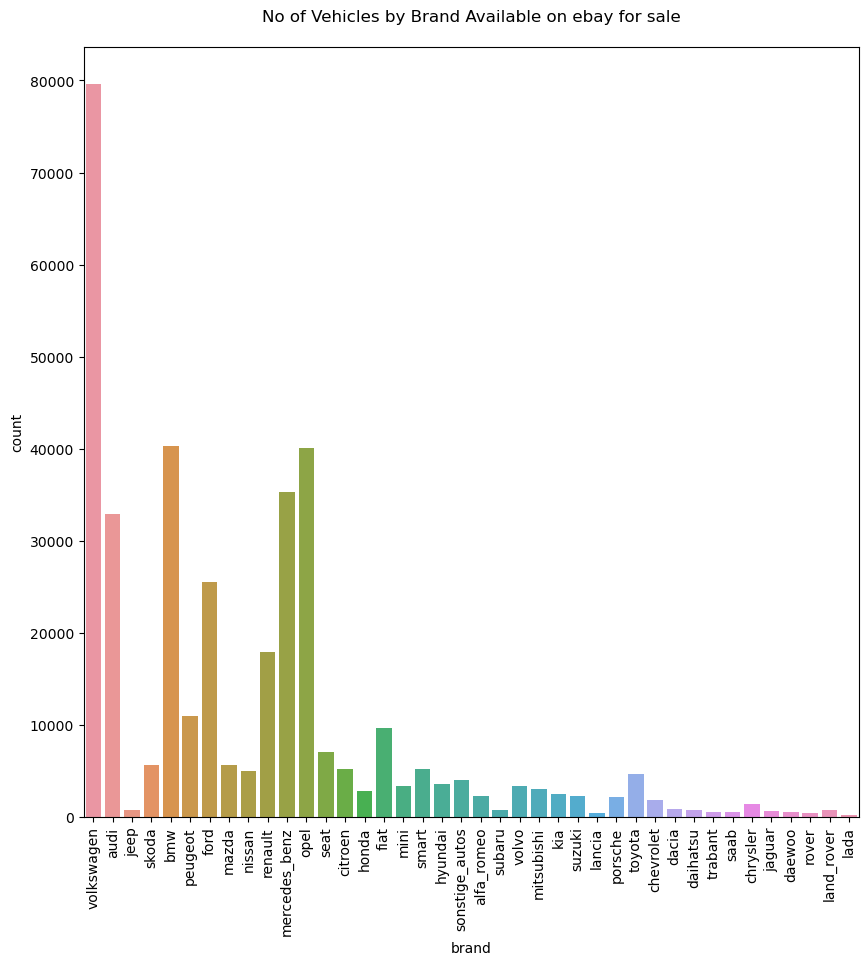

In [10]:
plt.figure(figsize=(10,10))
sns.countplot(autos, x="brand")
plt.title("No of Vehicles by Brand Available on ebay for sale\n")
plt.xticks(rotation=90)
plt.show()

In [22]:
# 2) What is the Average price for vehicles based on the type of vehicle as well as on the type of gearbox.Explain me with both numerical and visualization analysis

In [74]:
a=pd.pivot_table(autos,index="vehicleType", columns="gearbox", values="price", aggfunc="mean")
a

gearbox,Not mentioned,automatik,manuell
vehicleType,,,
Not mentioned,52208.845834,7600.924596,8639.161862
andere,3661.203252,7366.861496,825539.352000
bus,124897.289820,10599.265713,6321.168265
cabrio,9751.342246,16254.374208,14897.823880
coupe,233553.441558,35510.948175,12400.255031
kleinwagen,33104.509510,3889.552200,4606.803784
kombi,3445.444699,8910.045892,7464.741491
limousine,3904.749183,19004.102243,8505.151711
suv,7270.198276,16764.091774,10040.553599


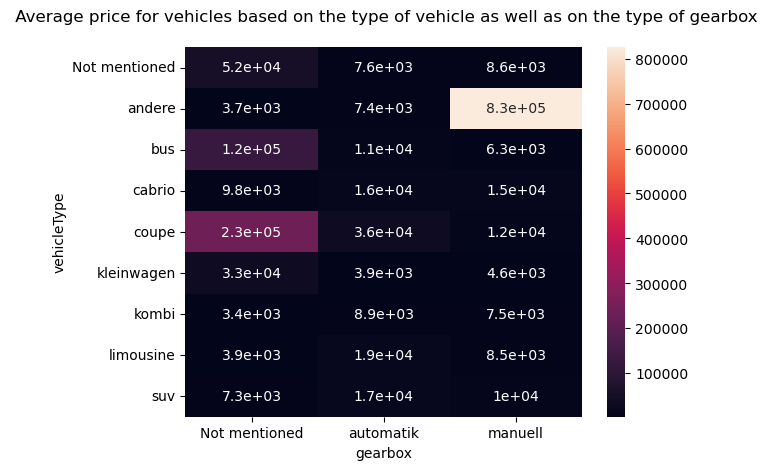

In [77]:
sns.heatmap(a, annot=True)
plt.title(" Average price for vehicles based on the type of vehicle as well as on the type of gearbox\n")
plt.show()

In [71]:
# 3) What is the marginal probability of private seller

In [17]:
pd.crosstab(index=autos["seller"], columns=autos.loc[autos["seller"]=="privat", "seller"], normalize="all", margins=True)

seller,privat,All
seller,,
privat,1.0,1.0
All,1.0,1.0


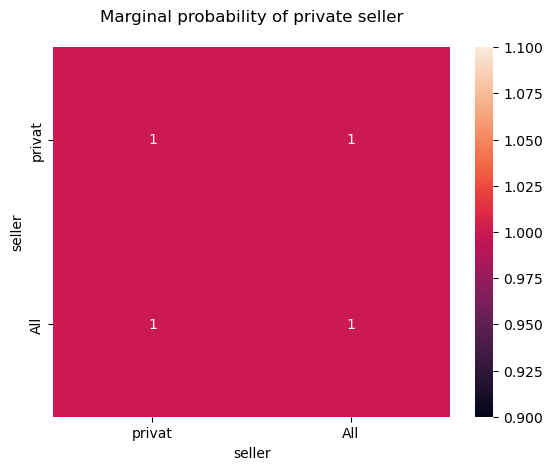

In [21]:
sns.heatmap(pd.crosstab(index=autos["seller"], columns=autos.loc[autos["seller"]=="privat", "seller"], normalize="all", margins=True), annot=True)
plt.title("Marginal probability of private seller\n")
plt.show()